In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hypothesis-soccer/women_results.csv
/kaggle/input/hypothesis-soccer/men_results.csv
/kaggle/input/hypothesis-soccer/fifa-hypothesis-tests.ipynb


In [50]:
import numpy as np # linear algebra
import pandas as pd

home_team: the name of team that was host of the match
away_team: the name of team that was guest of the match
home_score: the number of goals that the host team could score.
away_score: the number of goals that the guest team could score.
tournament: the name of the tournament or competitions.
Overall, we have 4884 records for women and 44,352 records for men.

In [51]:
men_df = pd.read_csv('/kaggle/input/hypothesis-soccer/men_results.csv')
women_df = pd.read_csv('/kaggle/input/hypothesis-soccer/women_results.csv')

In [52]:
#creat new column
men_df['goal'] = men_df['home_score'] + men_df['away_score']
women_df['goal'] = women_df['home_score'] + women_df['away_score']

#remove un-needed columns
men_df = men_df.drop(['Unnamed: 0', 'date', 'home_team' , 'away_team', 'home_score', 'away_score'], axis = 1)
women_df = women_df.drop(['Unnamed: 0', 'date', 'home_team' , 'away_team', 'home_score', 'away_score'], axis = 1)

Test Assumptions
For all above test, we must meet these two assumptions:

If I'm using one group (or two groups), that data must obey normal distribution. If the data is not normal, I use a nonparametric test, such as the Mann-Whitney U test or WilCoxin. To check the normality assumtpion, I use plots and statistical test.

If I'm using one two groups, their variance must be the same. Otherwise, I use Welch's t-test. To check the variance equality, I Levene's test.

Check Normality
Shapiro-Wilk
 Null: The the women's goals and men's come from normal distribution.
 Alt: The the women's goals and men's do not come from normal distribution.

In [53]:
from scipy.stats import shapiro

# declare variables
m_goal = men_df['goal']
w_goal = women_df['goal']

# Conduct the Shapiro-Wilk test for normality for each dataset
m_SW, m_SW_pvalue = shapiro(m_goal)
w_SW, w_SW_pvalue = shapiro(w_goal)

# Print the results of the Shapiro-Wilk test
print('Shapiro-Wilk test statistic for men:', m_SW)
print('p-value for men:', round(m_SW_pvalue, 4))
print()
print('Shapiro-Wilk test statistic for women:', w_SW)
print('p-value for women:', round(w_SW_pvalue , 4))

Shapiro-Wilk test statistic for men: 0.8972436900357965
p-value for men: 0.0

Shapiro-Wilk test statistic for women: 0.861581958610495
p-value for women: 0.0


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44353.
  res = hypotest_fun_out(*samples, **kwds)


Q-Q Plot
A Q-Q plot, or quantile-quantile plot, is a graphical method for assessing whether a set of data comes from a particular distribution, such as a normal distribution. If the data are normally distributed, the points on the Q-Q plot should fall along a straight line.

If the points on the Q-Q plot curve upward or downward, it suggests that the data have heavier or lighter tails.
If the points form an S-shaped curve, it suggests that the data have both heavier tails and more extreme values than a normal distribution.
It's important to note that the Q-Q plot is a visual tool and can be subjective.

In [54]:
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline

def QQ_plot(df , var):
    sm.qqplot(df[var], line='s')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sample quantiles')
    plt.show()

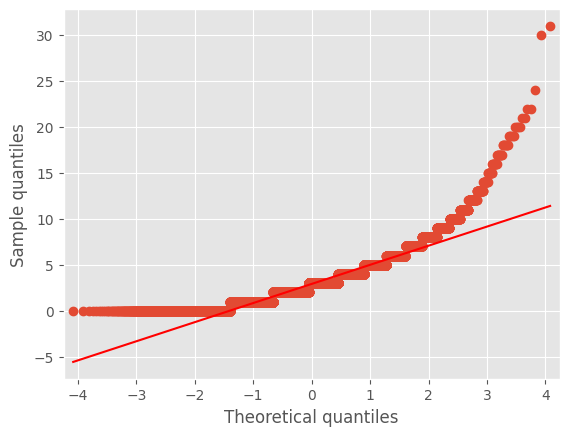

In [55]:
QQ_plot(men_df , 'goal')

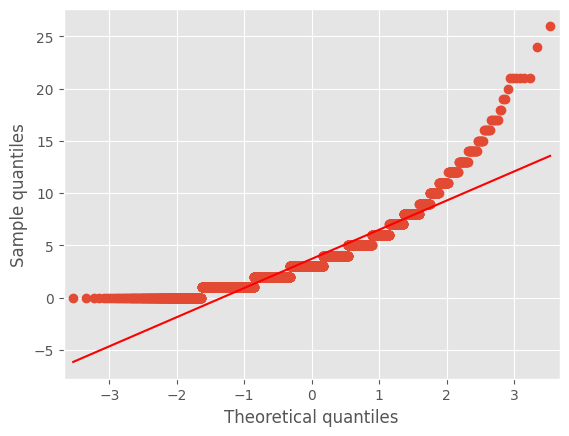

In [56]:
QQ_plot(women_df , 'goal')

In [57]:
#HISTOGRAM DISTRIBUTION
#create function to draw plot
def kde_plot(df, var):  
    plt.figure(figsize = (8,3))
    sns.distplot(df[var], kde_kws={"lw": 2}, hist_kws = {'alpha': 0.25})
    sns.despine(left = True)
    
    mean = df[var].mean()
    median = df[var].median()
    
    plt.axvline(mean, color ='black', linestyle ='dashed')
    plt.axvline(median, color ='green', linestyle ='solid')
    plt.xlabel('')
    plt.ylabel('')
    
    return plt.show()

/tmp/ipykernel_36/3960645619.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde_kws={"lw": 2}, hist_kws = {'alpha': 0.25})
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


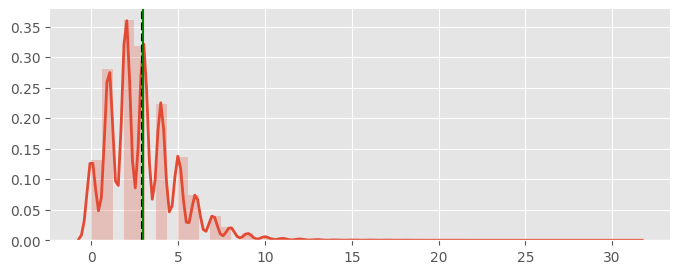

In [58]:
kde_plot(men_df, 'goal')

/tmp/ipykernel_36/3960645619.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde_kws={"lw": 2}, hist_kws = {'alpha': 0.25})
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


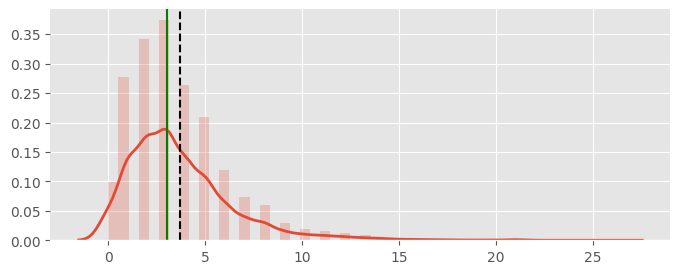

In [59]:
kde_plot(women_df, 'goal')

Check Variance Equality
I should compare the variances of the two datasets. For doing this, I use the Levene's test. If the variances are not equal, I need to use a modified t-test, such as the Welch's t-test, which does not assume equal variances.

 Null: The variances of the women's goals and men's are not significantly different.
 Alt: The variances of the women's goals and men's are significantly different.

In [60]:
from scipy.stats import levene

# declare variable
m_goal = men_df['goal']
w_goal = women_df['goal']

# Conduct the Levene's test to compare the variances of the two datasets
statistic, pvalue = levene(m_goal, w_goal)

print('Levene test statistic:', statistic)
print('p-value:', pvalue)

Levene test statistic: 309.72582760733775
p-value: 4.0829508280646485e-69


Test (1)
In this test, we want to analyse these hypothesis:

Null : The mean of scored goal of men's matches is equal or less than 2.5
 Alt: The mean of scored goal of men's matches is greater than 2.5
So, we can have the below equations:

 H0:Mum<= 2.5
 Ha:Mum>2.5
For answering this question, we consider this condition:

We have one sample
We don't know the population variance
We must test right-tail
So, with this condition, I use Z-Statistic

In [61]:
#the null value that question arose
Test1_Null_Value = 2.5

#the sample mean
Test1_Mean = men_df['goal'].mean()
Test1_Mean


2.9193515658467297

In [62]:
#the sample standard deviation 
n_bootstraps = 5000

# Generate n_bootstraps resamples of the data with replacement
Test1_boot = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    Test1_boot_sample = men_df['goal'].sample(frac = 1, replace = True)
    Test1_boot[i] = Test1_boot_sample.mean()

# Calculate the standard deviation of the means
Test1_Std = Test1_boot.std()

In [63]:
#compute z-score
Test1_Z = (Test1_Mean - Test1_Null_Value) / (Test1_Std)
Test1_Z

42.52344765516027

In [64]:
#Convert Z-score to normal standard CDF to find p-value
from scipy.stats import norm

# Right tailed
1 - norm.cdf(Test1_Z, loc = 0, scale = 1)

0.0

In [65]:

We can conclude the following statement:

alpha = 0.05
 p= 0
p < alpha, we reject H0 and we can say " The mean of scored goal of men's matches is greater than 2.5"

SyntaxError: invalid syntax (251754691.py, line 1)

Test (2)
In this test, we want to analyse these hypothesis:

null: The differences between men's goal with women's is greater or equal than 75%.
: The differences between men's goal with women's is less than 75%.
So, we can have the below equations:

 H0: Pm - Pw>=75%
 Ha: Pm - Pw<75%
#For answering this question, we consider this condition:

#
* We have two sample#We have large dataset#We don't know the population variance#We must test left-tail#So, with this condition, I use T-Statistic


In [ ]:
total_goal = women_df['goal'].sum() + men_df['goal'].sum()
p_men = men_df['goal'].sum() / total_goal
p_women = women_df['goal'].sum() / total_goal

print(p_men , p_women)

In [ ]:
n_women = len(women_df)
n_men = len(men_df)

se = np.sqrt((p_women * (1 - p_women) / n_women) + (p_men * (1 - p_men) / n_men))
se

In [ ]:
#test 2

In [ ]:
Test2_Null_Value = 0.75
Differenece = p_men - p_women

t_score = (Differenece - Test2_Null_Value) / se
t_score

In [ ]:
#Convert t-score to t-standard CDF to find p-value
from scipy.stats import t

degree = n_women + n_men - 2

#Left tailed
t.cdf(t_score, df = degree)

We can conclude the following statement:

 alpha= 0.05
 p= 0.835
p > alpha, we fail to reject H0 and we can say " The differences between men's goal with women's is greater or equal than 75%"
